In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [152]:
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('Unique_Tourist_Destinations.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())
print("\nData Types:")
display(df.describe().T)

Loading data file now, this could take a while depending on file size
Loading took 0.01 seconds

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
Destination           2000
Country                 20
Famous Attraction       20
Best Time to Visit       8
Known For               10
dtype: int64

Data Types:


,count,unique,top,freq
Destination,2000,2000,Destination_1984,1
Country,2000,20,Egypt,123
Famous Attraction,2000,20,Christ the Redeemer,127
Best Time to Visit,2000,8,November to February,264
Known For,2000,10,"Festivals, music, and local traditions",221


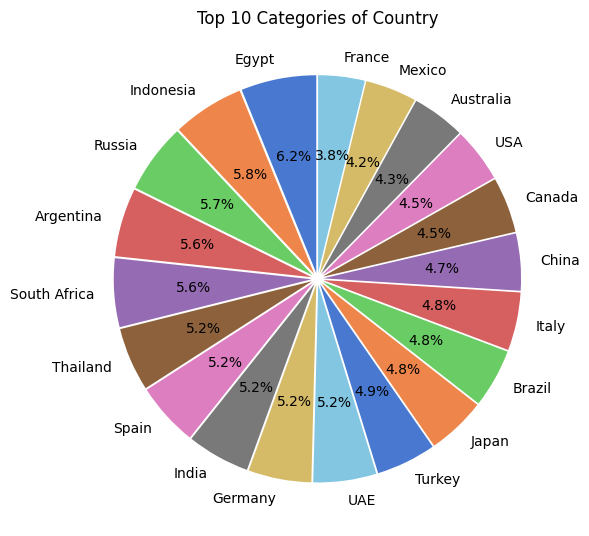

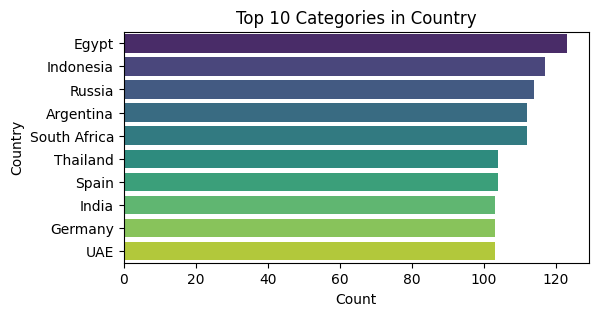

In [140]:
def plot_top_categories_pie_charts(Numerical_Columns, data=df, palette='muted',t_top=10):
    plt.figure(figsize=(len(Numerical_Columns) * 6, 6))  
    
    # Loop through each column and create a pie chart
    for i, column_name in enumerate(Numerical_Columns):
        plt.subplot(1, len(Numerical_Columns), i + 1)  
        
        # Get the top 10 categories based on frequency
        top_categories = data[column_name].value_counts().nlargest(t_top)
        
        # Plot the pie chart
        top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette), 
                                 startangle=90, explode=[0.03] * len(top_categories))
        
        plt.title(f'Top 10 Categories of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()

def plot_top_categories_bar_charts(column_name, data=df, palette='viridis', t_top=10):
    top_categories = data[column_name].value_counts().nlargest(t_top)

    plt.figure(figsize=(6, 3))
    sns.barplot(
        y=top_categories.index, 
        x=top_categories.values, 
        palette=palette
    )
    plt.title(f'Top {t_top} Categories in {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.show()



columns_to_plot = ['Country']
plot_top_categories_pie_charts(columns_to_plot, t_top=20)
plot_top_categories_bar_charts('Country')

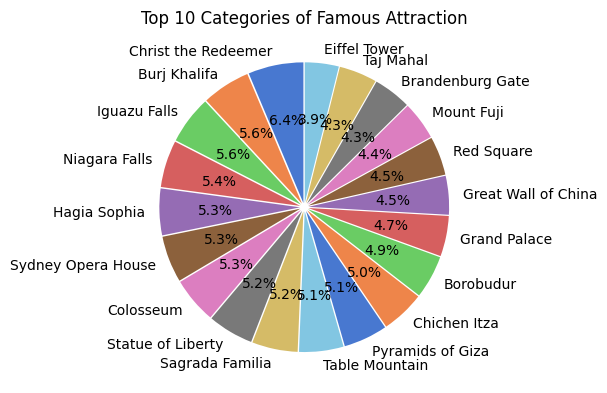

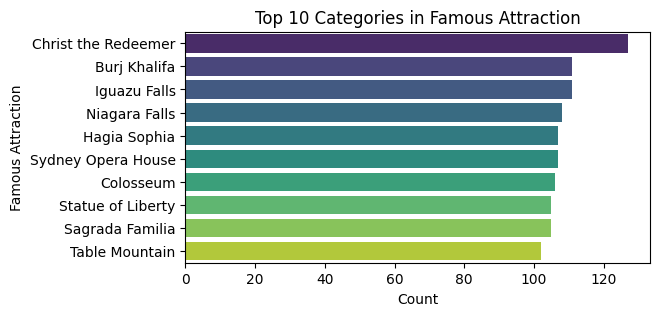

In [149]:
columns_to_plot = ['Famous Attraction']
plot_top_categories_pie_charts(columns_to_plot,t_top=99)
plot_top_categories_bar_charts('Famous Attraction')

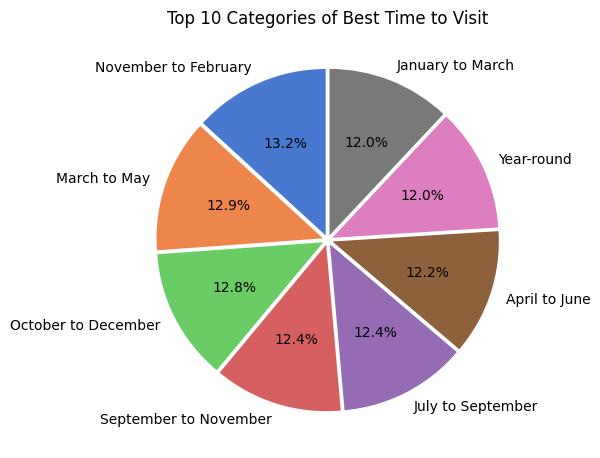

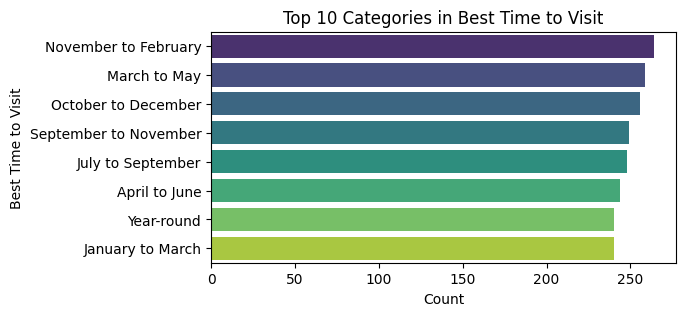

In [142]:
columns_to_plot = ['Best Time to Visit']
plot_top_categories_pie_charts(columns_to_plot,t_top=20)
plot_top_categories_bar_charts('Best Time to Visit')

In [143]:
df[['Start_month', 'Final_month']] = df['Best Time to Visit'].str.split(' to ', expand=True)
df.head()

,Destination,Country,Famous Attraction,Best Time to Visit,Known For,Start_month,Final_month
0,Destination_1,France,Colosseum,July to September,"Shopping, dining, and entertainment options",July,September
1,Destination_2,Spain,Mount Fuji,March to May,Beautiful beaches and crystal-clear waters,March,May
2,Destination_3,Japan,Brandenburg Gate,October to December,World-class museums and cultural landmarks,October,December
3,Destination_4,Turkey,Sydney Opera House,October to December,Rich history and stunning architecture,October,December
4,Destination_5,China,Burj Khalifa,March to May,Unique wildlife and natural beauty,March,May


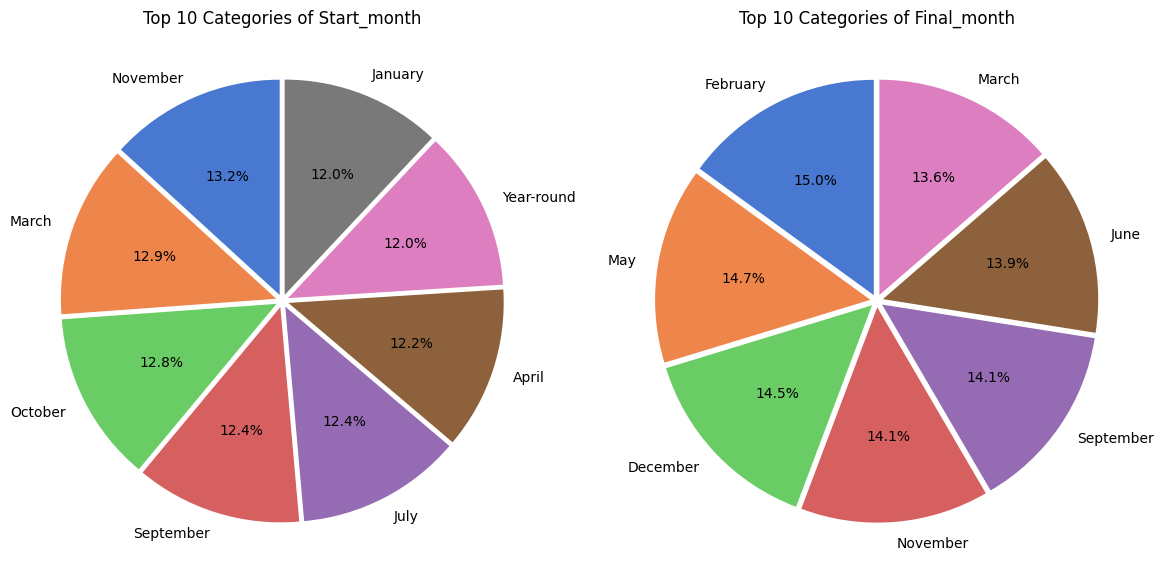

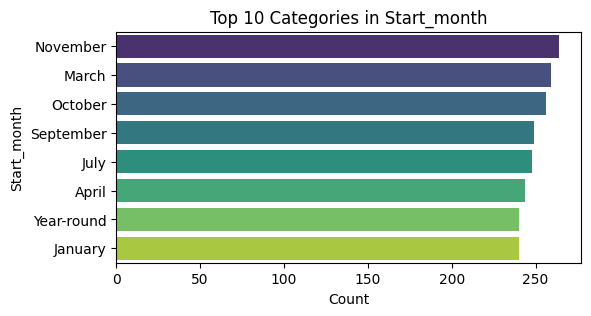

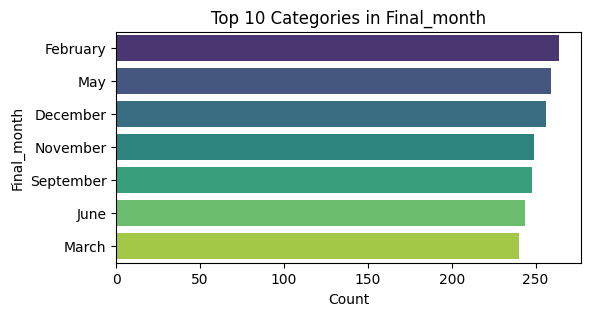

Destination             0
Country                 0
Famous Attraction       0
Best Time to Visit      0
Known For               0
Start_month             0
Final_month           240
dtype: int64

In [144]:
columns_to_plot = ['Start_month', 'Final_month']
plot_top_categories_pie_charts(columns_to_plot,t_top=20)
plot_top_categories_bar_charts('Start_month')
plot_top_categories_bar_charts('Final_month')
df.isna().sum()

In [145]:
df.fillna('Year-round', inplace=True)
print(df.isna().sum())
print("duplicated : ", df.duplicated().sum())

Destination           0
Country               0
Famous Attraction     0
Best Time to Visit    0
Known For             0
Start_month           0
Final_month           0
dtype: int64
duplicated :  0


In [146]:
df.drop(columns=['Best Time to Visit','Destination'], inplace=True)